In [2]:
import pandas as pd

In [ ]:
df = pd.read_csv("Salaries.csv")

# Taille du jeu de données
print(df.shape)         
# Types des variables et valeurs manquantes
print(df.info())
# valeurs manquantes par colonne
print(df.isna().sum()) 
# Verifier les doublons
df.duplicated().sum()

(474, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 474 entries, 0 to 473
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Salaire     474 non-null    int64
 1   Education   474 non-null    int64
 2   Minorite    474 non-null    int64
 3   Genre       474 non-null    int64
 4   Anciennete  474 non-null    int64
 5   Cadre       474 non-null    int64
dtypes: int64(6)
memory usage: 22.3 KB
None
Salaire       0
Education     0
Minorite      0
Genre         0
Anciennete    0
Cadre         0
dtype: int64


np.int64(0)

In [4]:
# Statistiques descriptives générales
print(df.describe())

             Salaire   Education    Minorite       Genre  Anciennete  \
count     474.000000  474.000000  474.000000  474.000000  474.000000   
mean    34419.567511   13.491561    0.219409    0.455696  176.970464   
std     17075.661465    2.884846    0.414284    0.498559  105.098862   
min     15750.000000    8.000000    0.000000    0.000000   65.000000   
25%     24000.000000   12.000000    0.000000    0.000000  100.000000   
50%     28875.000000   12.000000    0.000000    0.000000  140.000000   
75%     36937.500000   15.000000    0.000000    1.000000  221.750000   
max    135000.000000   21.000000    1.000000    1.000000  554.000000   

            Cadre  
count  474.000000  
mean     0.177215  
std      0.382254  
min      0.000000  
25%      0.000000  
50%      0.000000  
75%      0.000000  
max      1.000000  


alors ona trouve que ona:

474 lignes (474 employés)

6 variables : Salaire, Education, Minorite, Genre, Anciennete, Cadre

Toutes les colonnes sont de type entier

Aucune valeur manquante

Aucun doublon

## Statistiques descriptives des variables quantitatives

In [5]:
df[['Salaire', 'Education', 'Anciennete']].describe()

,Salaire,Education,Anciennete
count,474.000000,474.000000,474.000000
mean,34419.567511,13.491561,176.970464
std,17075.661465,2.884846,105.098862
min,15750.000000,8.000000,65.000000
25%,24000.000000,12.000000,100.000000
50%,28875.000000,12.000000,140.000000
75%,36937.500000,15.000000,221.750000
max,135000.000000,21.000000,554.000000


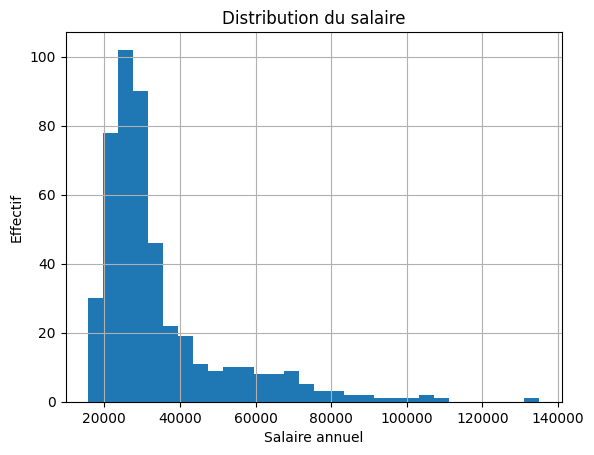

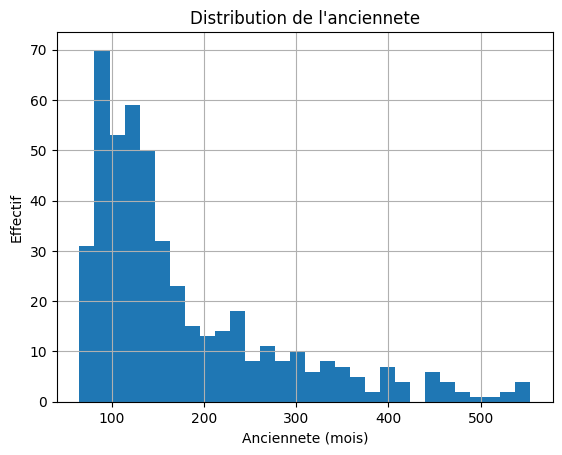

In [9]:
import matplotlib.pyplot as plt

df['Salaire'].hist(bins=30)
plt.xlabel("Salaire annuel")
plt.ylabel("Effectif")
plt.title("Distribution du salaire")

plt.figure()
df['Anciennete'].hist(bins=30)
plt.xlabel("Anciennete (mois)")
plt.ylabel("Effectif")
plt.title("Distribution de l'anciennete")

plt.show()


## Variables qualitatives : fréquences et pourcentages

In [10]:
for col in ['Cadre', 'Genre', 'Minorite']:
    counts = df[col].value_counts()
    perc = df[col].value_counts(normalize=True) * 100
    print(pd.concat([counts, perc], axis=1, keys=['Effectif', '%']))

       Effectif          %
Cadre                     
0           390  82.278481
1            84  17.721519
       Effectif         %
Genre                    
0           258  54.43038
1           216  45.56962
          Effectif          %
Minorite                     
0              370  78.059072
1              104  21.940928


Cadre (1 = cadre, 0 = non cadre)

Genre (1 = femme, 0 = homme)

Minorite (1 = oui, 0 = non)


## Comparaison cadres / non‑cadres

In [11]:
df.groupby('Cadre').agg({
    'Salaire': ['mean','median'],
    'Education': ['mean','median'],
    'Anciennete': ['mean','median'],
    'Genre': 'mean',
    'Minorite': 'mean'
})

Salaire           Education         Anciennete            Genre  \
               mean   median       mean median        mean median      mean   
Cadre                                                                         
0      28053.179487  27000.0  12.682051   12.0  180.889744  140.0  0.528205   
1      63977.797619  60500.0  17.250000   17.0  158.773810  137.0  0.119048   

       Minorite  
           mean  
Cadre            
0      0.256410  
1      0.047619

# Interprétation des résultats :

#### Salaire moyen

Non‑cadres : ≈ 28 100 $ , Cadres :  63 980 $

Alors on peut dire que Les cadres gagnent en moyenne plus du double.

#### Années d’éducation

Non‑cadres : ≈ 12,7 ans , Cadres :  17,3 ans

Alors on peut dire que Les cadres ont nettement plus d’années d’études.

#### Ancienneté (en mois)

Non‑cadres : ≈ 181 mois , Cadres :  159 mois

Alors on peut dire que L’ancienneté n’est pas plus élevée chez les cadres, au contraire elle est légèrement plus faible.

#### Genre (proportion de femmes)

Non‑cadres : ≈ 53 % de femmes , Cadres :  12 % de femmes

Alors on peut dire que Les femmes sont très sous‑représentées parmi les cadres.

#### Minorité (proportion appartenant à une minorité)

Non‑cadres : ≈ 25,6 % , Cadres : 4,8 %

Alors on peut dire que Les minorités sont également très sous‑représentées parmi les cadres.

## Conclusion

La variable Cadre semble fortement liée au salaire et à l’éducation, et aussi au genre et à la minorité.

La base est propre et prête pour des analyses plus poussées (corrélations, régression logistique)